# CREATOR- SUBHANKAR ROY

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import warnings

In [2]:
# Setting parameters

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 15,15

In [5]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.drop('Id',axis=1)

In [7]:
df.shape


(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

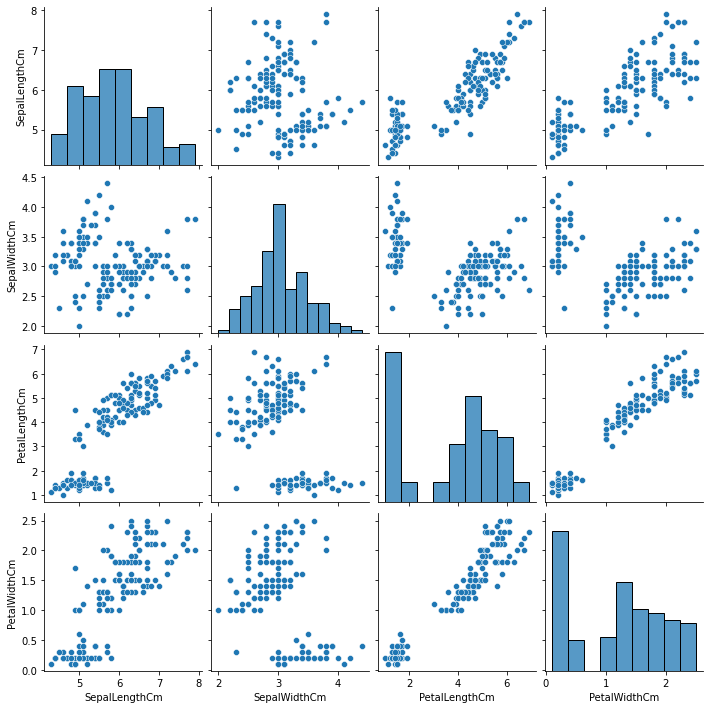

In [10]:
sns.pairplot(df)

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
for i in sorted(df['Species'].unique()):
    print(f'{i} will be replaced by {sorted(df.Species.unique()).index(i)}.')

Iris-setosa will be replaced by 0.
Iris-versicolor will be replaced by 1.
Iris-virginica will be replaced by 2.


In [14]:
df['Species'] = df['Species'].astype('category').cat.codes
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
wcss = []

for i in range(1,12):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

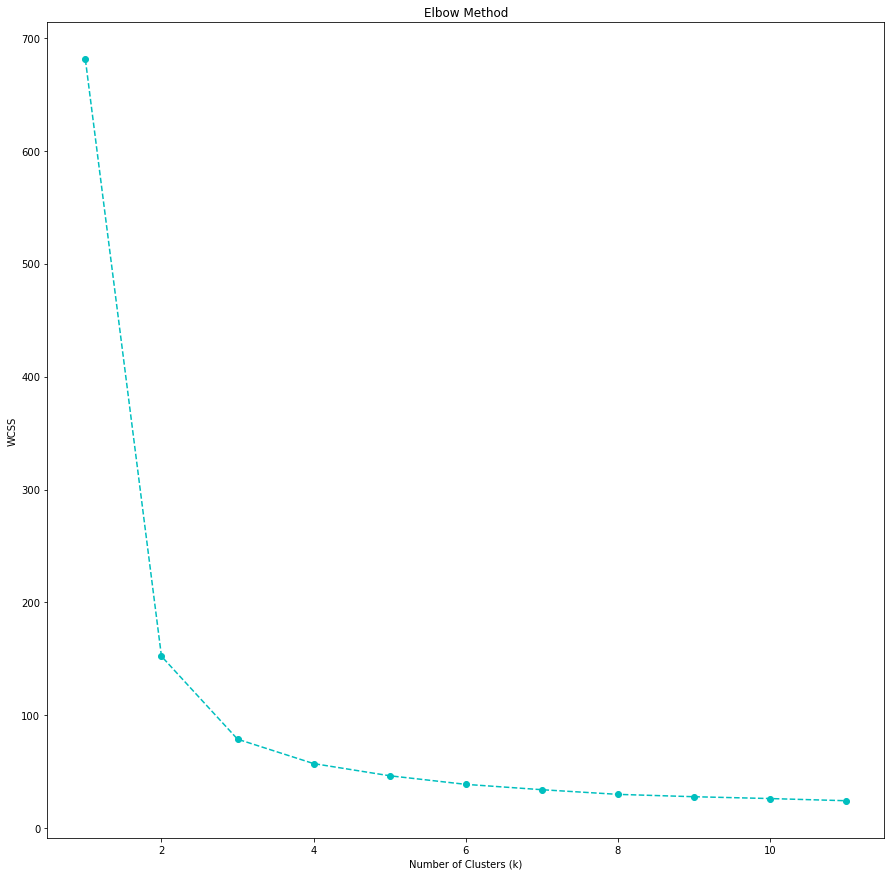

In [18]:
plt.plot([i for i in range(1,12)], wcss,'c--o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Sudden change at k = 3. So number of clusters that we select will be 3.

In [19]:
model_km = KMeans(n_clusters=3)

In [20]:
y_predict = model_km.fit_predict(x)

In [21]:
print(f'Clustering score of model: {np.round(silhouette_score(x,model_km.labels_)*100, 2)}%.')

Clustering score of model: 55.26%.


Above score indicates that the model is able to cluster the given data successfully. However, there is some amount of overlapping between them leading to a score of 0.55. The overlapping between the clusters is visualized below.

Text(0, 0.5, 'Petal Length')

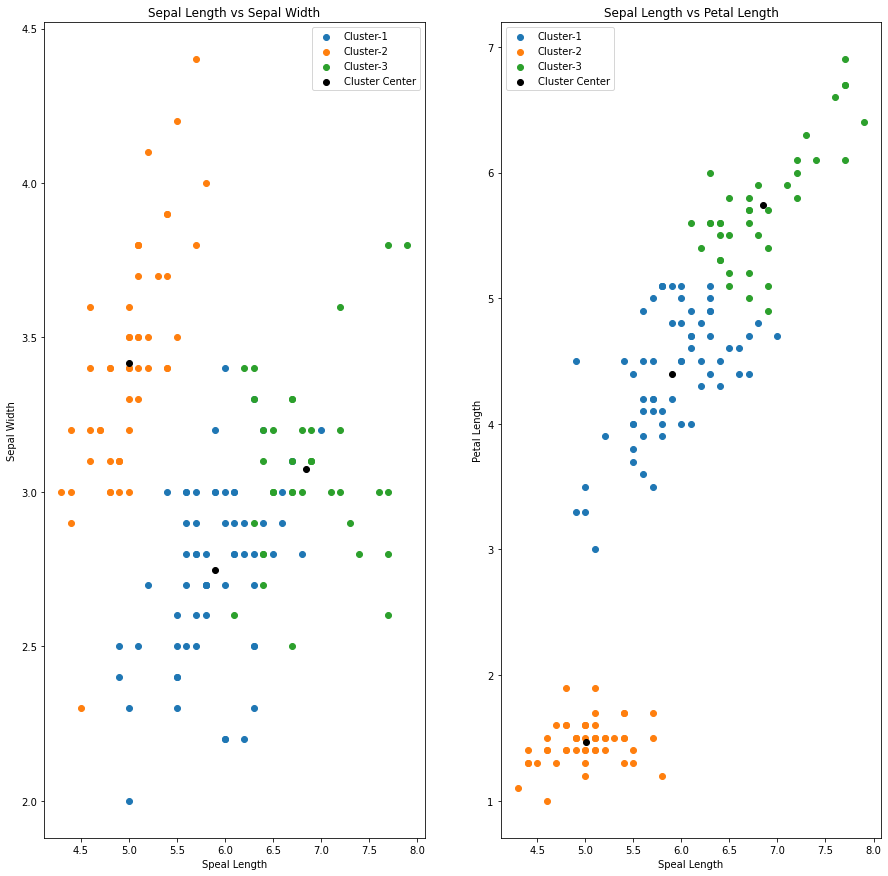

In [22]:
plt.subplot(121)
plt.scatter(x[y_predict == 0,0] , x[y_predict == 0,1], label = 'Cluster-1')
plt.scatter(x[y_predict == 1,0] , x[y_predict == 1,1], label = 'Cluster-2')
plt.scatter(x[y_predict == 2,0] , x[y_predict == 2,1], label = 'Cluster-3')
plt.scatter(x = model_km.cluster_centers_[:,0], y = model_km.cluster_centers_[:,1], color = 'black', label = 'Cluster Center')
plt.legend()
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Speal Length')
plt.ylabel('Sepal Width')

plt.subplot(122)
plt.scatter(x[y_predict == 0,0] , x[y_predict == 0,2], label = 'Cluster-1')
plt.scatter(x[y_predict == 1,0] , x[y_predict == 1,2], label = 'Cluster-2')
plt.scatter(x[y_predict == 2,0] , x[y_predict == 2,2], label = 'Cluster-3')
plt.scatter(x = model_km.cluster_centers_[:,0], y = model_km.cluster_centers_[:,2], color = 'black', label = 'Cluster Center')
plt.legend()
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Speal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Length')

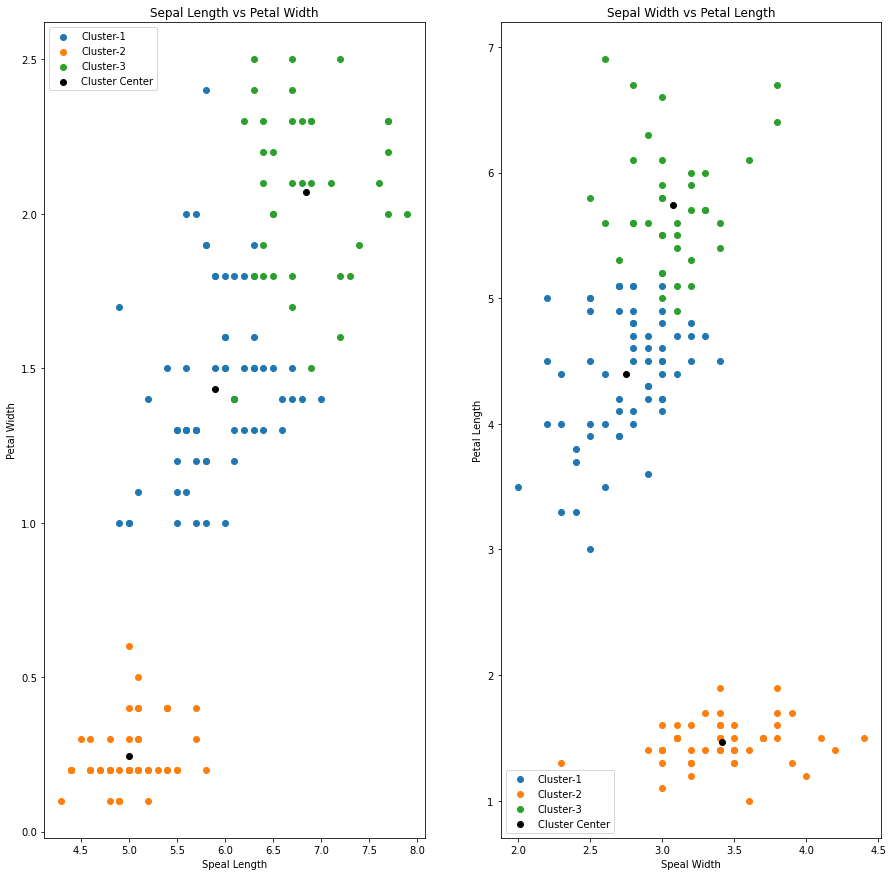

In [23]:
plt.subplot(121)
plt.scatter(x[y_predict == 0,0] , x[y_predict == 0,3], label = 'Cluster-1')
plt.scatter(x[y_predict == 1,0] , x[y_predict == 1,3], label = 'Cluster-2')
plt.scatter(x[y_predict == 2,0] , x[y_predict == 2,3], label = 'Cluster-3')
plt.scatter(x = model_km.cluster_centers_[:,0], y = model_km.cluster_centers_[:,3], color = 'black', label = 'Cluster Center')
plt.legend()
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Speal Length')
plt.ylabel('Petal Width')

plt.subplot(122)
plt.scatter(x[y_predict == 0,1] , x[y_predict == 0,2], label = 'Cluster-1')
plt.scatter(x[y_predict == 1,1] , x[y_predict == 1,2], label = 'Cluster-2')
plt.scatter(x[y_predict == 2,1] , x[y_predict == 2,2], label = 'Cluster-3')
plt.scatter(x = model_km.cluster_centers_[:,1], y = model_km.cluster_centers_[:,2], color = 'black', label = 'Cluster Center')
plt.legend()
plt.title('Sepal Width vs Petal Length')
plt.xlabel('Speal Width')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Length')

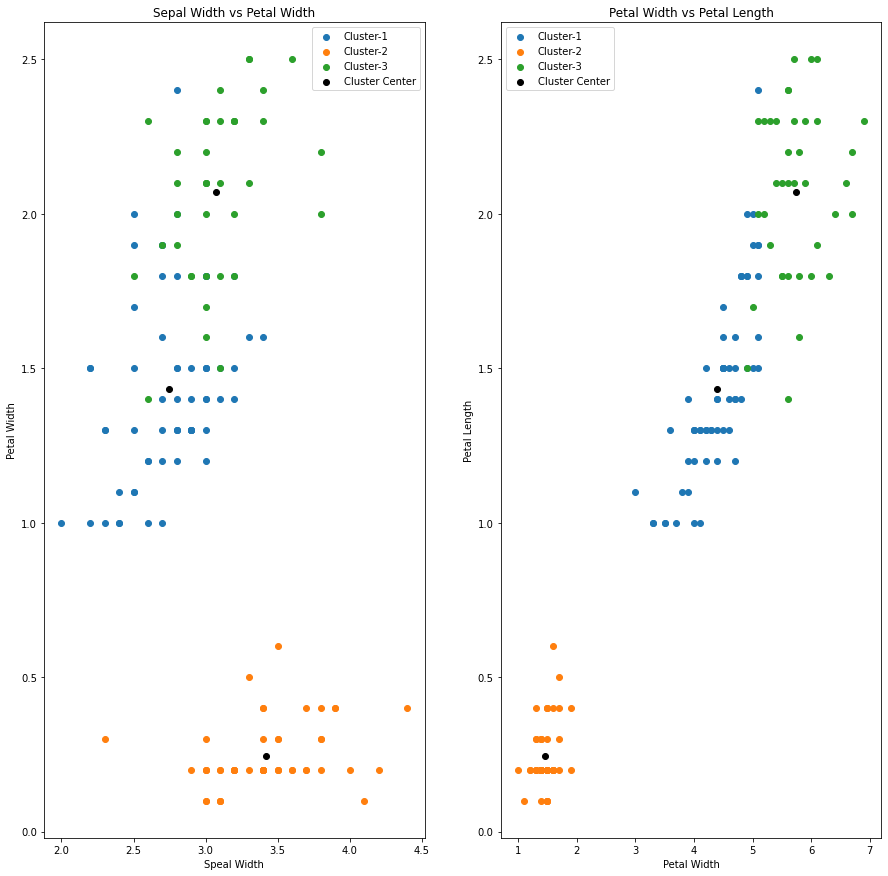

In [24]:
plt.subplot(121)
plt.scatter(x[y_predict == 0,1] , x[y_predict == 0,3], label = 'Cluster-1')
plt.scatter(x[y_predict == 1,1] , x[y_predict == 1,3], label = 'Cluster-2')
plt.scatter(x[y_predict == 2,1] , x[y_predict == 2,3], label = 'Cluster-3')
plt.scatter(x = model_km.cluster_centers_[:,1], y = model_km.cluster_centers_[:,3], color = 'black', label = 'Cluster Center')
plt.legend()
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Speal Width')
plt.ylabel('Petal Width')

plt.subplot(122)
plt.scatter(x[y_predict == 0,2] , x[y_predict == 0,3], label = 'Cluster-1')
plt.scatter(x[y_predict == 1,2] , x[y_predict == 1,3], label = 'Cluster-2')
plt.scatter(x[y_predict == 2,2] , x[y_predict == 2,3], label = 'Cluster-3')
plt.scatter(x = model_km.cluster_centers_[:,2], y = model_km.cluster_centers_[:,3], color = 'black', label = 'Cluster Center')
plt.legend()
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')